In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
sns.set_style('white')

%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [26]:
# Load raw data into DataFrame using pandas
road_features_df_raw = pd.read_csv('Road_features.csv', delimiter=',')

In [54]:
#Drop 
road_features_df = road_features_df_raw[~(road_features_df_raw['State'] == 'Total ')].fillna(0)

In [55]:
road_features_df.head()

,SNo,State,SingleLane-Accident-2014,Single Lane-Killed-2014,SingleLane-Injured-2014,Two Lanes - Accident - 2014,Two Lanes - Killed - 2014,Two Lanes - Injured - 2014,3 Lanes or more w.o Median - Accident - 2014,3 Lanes or more w.o Median - Killed - 2014,3 Lanes or more w.o Median - Injured - 2014,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Injured - 2014
0,1,Andhra Pradesh,8634.0,2958.0,13541.0,10327.0,2994.0,10122.0,1188.0,396.0,1199.0,4291.0,1560.0,5069.0
1,2,Arunachal Pradesh,90.0,60.0,152.0,115.0,59.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Assam,3888.0,1217.0,3195.0,2432.0,1035.0,2510.0,56.0,25.0,42.0,768.0,245.0,752.0
3,4,Bihar,3731.0,1815.0,2475.0,4156.0,2096.0,3092.0,756.0,390.0,485.0,913.0,612.0,588.0
4,5,Chhattisgarh,7961.0,2244.0,7762.0,4696.0,1524.0,4661.0,0.0,0.0,0.0,1164.0,254.0,734.0


In [56]:
road_features_df.tail()

,SNo,State,SingleLane-Accident-2014,Single Lane-Killed-2014,SingleLane-Injured-2014,Two Lanes - Accident - 2014,Two Lanes - Killed - 2014,Two Lanes - Injured - 2014,3 Lanes or more w.o Median - Accident - 2014,3 Lanes or more w.o Median - Killed - 2014,3 Lanes or more w.o Median - Injured - 2014,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Injured - 2014
31,32,Dadra & Nagar Haveli,21.0,15.0,28.0,66.0,44.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0
32,33,Daman & Diu,13.0,5.0,11.0,26.0,10.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0
33,34,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,35,Lakshadweep,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,36,Puducherry,525.0,43.0,393.0,567.0,108.0,930.0,0.0,0.0,0.0,19.0,0.0,0.0


In [35]:
#print(road_features_df)
road_features_df[['State','SingleLane-Accident-2014']][:2]

,State,SingleLane-Accident-2014
0,Andhra Pradesh,8634.0
1,Arunachal Pradesh,90.0


In [36]:
print(np.sum(road_features_df['SingleLane-Accident-2014']))
print(np.mean(road_features_df['SingleLane-Accident-2014']))

207725.0
5935.0


In [49]:
# Replacing NaN with 0
single_lane_killed_2014 = road_features_df[['State','Single Lane-Killed-2014']].fillna(0)

In [50]:
single_lane_killed_2014.tail(5)

,State,Single Lane-Killed-2014
31,Dadra & Nagar Haveli,15.0
32,Daman & Diu,5.0
33,Delhi,0.0
34,Lakshadweep,0.0
35,Puducherry,43.0


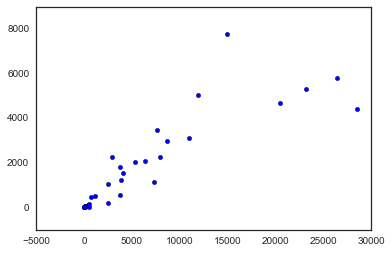

In [57]:
# Just to test scatter plotting
plt.scatter(road_features_df['SingleLane-Accident-2014'].tolist(), road_features_df['Single Lane-Killed-2014'].tolist())

([<matplotlib.axis.XTick at 0x107377710>,
 <a list of 36 Text xticklabel objects>)

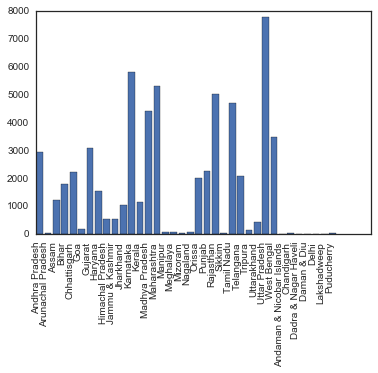

In [68]:
y_pos = np.arange(len(road_features_df['State'].tolist()))
plt.bar(y_pos, road_features_df['Single Lane-Killed-2014'])
plt.xticks(y_pos, road_features_df['State'], rotation=90)

<Container object of 36 artists>

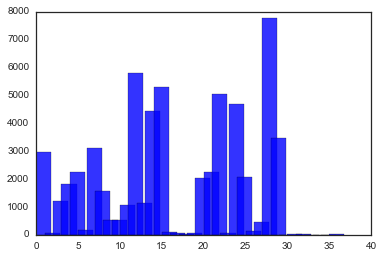

In [75]:
bar_width = 1.8
opacity = 0.8
plt.bar(y_pos, road_features_df['Single Lane-Killed-2014'], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Bubble')